In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [135]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
df_train.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0


In [136]:
df_test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')
df_test.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
5,2195,6,1027.1,15.6,12.6,11.5,9.0,76.0,94.0,0.0,20.0,41.4
6,2196,7,1022.6,15.5,13.7,10.7,11.8,79.0,95.0,0.0,20.0,43.1
7,2197,8,1013.5,20.5,16.2,15.2,13.1,94.0,93.0,0.2,70.0,41.3
8,2198,9,1021.3,16.3,13.2,11.3,10.8,85.0,99.0,0.1,20.0,34.0
9,2199,10,1026.1,10.4,8.5,7.0,3.1,69.0,88.0,0.0,20.0,26.4


In [137]:
# Check data types
print(df_train.info())

# Summary statistics
print(df_train.describe())

# Check for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.94

In [138]:
import numpy as np
import pandas as pd

# Fix column name
df_train.rename(columns={'temparature': 'temperature'}, inplace=True)
df_test.rename(columns={'temparature': 'temperature'}, inplace=True)

# Handle missing values in winddirection (Fix inplace issue)
df_test['winddirection'] = df_test['winddirection'].fillna(df_test['winddirection'].median())

# Create cyclical features for 'day' (sin and cos transformations)
df_train['day_sin'] = np.sin(2 * np.pi * df_train['day'] / 365)
df_train['day_cos'] = np.cos(2 * np.pi * df_train['day'] / 365)
df_test['day_sin'] = np.sin(2 * np.pi * df_test['day'] / 365)
df_test['day_cos'] = np.cos(2 * np.pi * df_test['day'] / 365)

# Drop original 'day' column
df_train.drop(columns=['day'], inplace=True)
df_test.drop(columns=['day'], inplace=True)

# Create temperature range feature
df_train['temp_range'] = df_train['maxtemp'] - df_train['mintemp']
df_test['temp_range'] = df_test['maxtemp'] - df_test['mintemp']

# Display cleaned data
print(df_train.head())
print(df_test.head())


   id  pressure  maxtemp  temperature  mintemp  dewpoint  humidity  cloud  \
0   0    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1   1    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2   2    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3   3    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4   4    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   

   sunshine  winddirection  windspeed  rainfall   day_sin   day_cos  \
0       1.1           60.0       17.2         1  0.017213  0.999852   
1       0.0           50.0       21.9         1  0.034422  0.999407   
2       8.3           70.0       18.1         1  0.051620  0.998667   
3       0.0           60.0       35.6         1  0.068802  0.997630   
4       3.6           40.0       24.8         0  0.085965  0.996298   

   temp_range  
0         1.3  
1         0.4  
2         4.8  
3         1.2  
4         6.1  
     id  press

Outliers in windspeed:
         id  pressure  maxtemp  temperature  mintemp  dewpoint  humidity  \
7        7    1019.7     15.8         13.6     12.7      11.8      96.0   
145    145    1008.7     32.1         29.8     27.5      25.5      81.0   
269    269    1010.3     27.8         25.4     23.7      23.5      89.0   
270    270    1018.1     28.1         27.1     25.4      25.1      90.0   
273    273    1014.8     24.5         23.1     22.7      22.9      90.0   
368    368    1022.9     16.2         13.3     11.6      12.1      84.0   
732    732    1013.5     23.2         18.0     17.5      16.0      79.0   
733    733    1014.9     18.6         17.3     16.9      16.8      95.0   
735    735    1021.6     14.3         13.7     11.8      11.1      67.0   
749    749    1021.6     20.3         16.1     14.3      13.2      76.0   
1001  1001    1018.9     26.1         24.8     23.5      19.9      70.0   
1005  1005    1016.9     24.8         22.9     20.6      22.2      92.0   
1

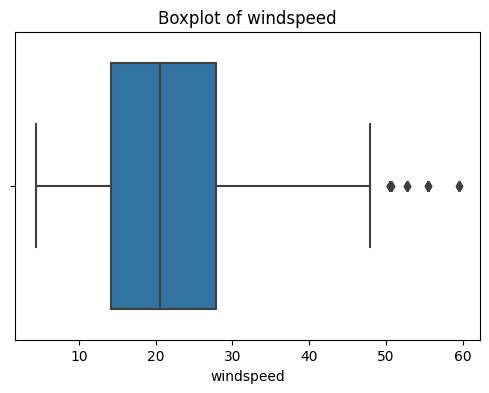

Outliers in temperature:
 Empty DataFrame
Columns: [id, pressure, maxtemp, temperature, mintemp, dewpoint, humidity, cloud, sunshine, winddirection, windspeed, rainfall, day_sin, day_cos, temp_range]
Index: []


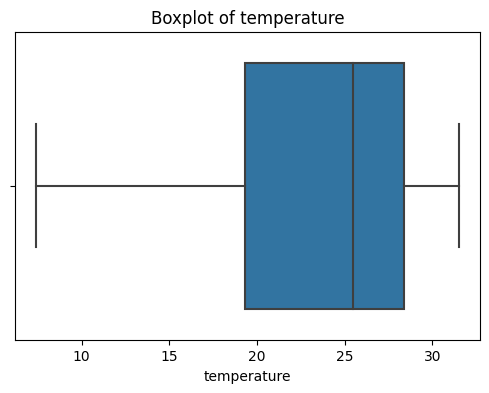

Preprocessing complete! Ready for model training 🚀


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Visualizing outliers with a boxplot
def plot_outliers(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Check for outliers in 'windspeed' and 'temperature'
for col in ['windspeed', 'temperature']:
    print(f"Outliers in {col}:\n", detect_outliers(df_train, col))
    plot_outliers(df_train, col)

# Normalize continuous features using Min-Max scaling
scaler = MinMaxScaler()
continuous_features = ['windspeed', 'temperature', 'maxtemp', 'mintemp', 'humidity']

df_train[continuous_features] = scaler.fit_transform(df_train[continuous_features])
df_test[continuous_features] = scaler.transform(df_test[continuous_features])

# Encoding categorical variables (if any)
if 'winddirection' in df_train.columns:
    df_train = pd.get_dummies(df_train, columns=['winddirection'], prefix='winddir')
    df_test = pd.get_dummies(df_test, columns=['winddirection'], prefix='winddir')

# Ensure both train and test datasets have the same columns after encoding
missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Add missing columns to test set with default 0

print("Preprocessing complete! Ready for model training 🚀")


In [141]:
def cap_outliers(df, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

df_train = cap_outliers(df_train, 'windspeed')
df_test = cap_outliers(df_test, 'windspeed')


In [142]:
df_train['temp_diff'] = df_train['maxtemp'] - df_train['mintemp']
df_test['temp_diff'] = df_test['maxtemp'] - df_test['mintemp']

df_train['humidity_index'] = df_train['humidity'] / df_train['temperature']
df_test['humidity_index'] = df_test['humidity'] / df_test['temperature']

df_train['windspeed_category'] = pd.cut(df_train['windspeed'], bins=[0, 20, 40, np.inf], labels=['Low', 'Medium', 'High'])
df_test['windspeed_category'] = pd.cut(df_test['windspeed'], bins=[0, 20, 40, np.inf], labels=['Low', 'Medium', 'High'])


In [143]:
from sklearn.model_selection import train_test_split

# Define target variable
X = df_train.drop(columns=['rainfall'])  
y = df_train['rainfall']  

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [144]:
# Check column data types
print(df_train.dtypes)

# Check unique values in categorical columns
for col in df_train.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df_train[col].unique()[:5]}")  # Show first 5 unique values


id                       int64
pressure               float64
maxtemp                float64
temperature            float64
mintemp                float64
dewpoint               float64
humidity               float64
cloud                  float64
sunshine               float64
windspeed              float64
rainfall                 int64
day_sin                float64
day_cos                float64
temp_range             float64
winddir_10.0              bool
winddir_15.0              bool
winddir_20.0              bool
winddir_25.0              bool
winddir_30.0              bool
winddir_40.0              bool
winddir_50.0              bool
winddir_60.0              bool
winddir_65.0              bool
winddir_70.0              bool
winddir_75.0              bool
winddir_80.0              bool
winddir_90.0              bool
winddir_100.0             bool
winddir_110.0             bool
winddir_120.0             bool
winddir_130.0             bool
winddir_140.0             bool
winddir_

In [145]:
df_train = df_train.apply(pd.to_numeric, errors='coerce')  # Convert where possible


In [146]:
df_numeric = df_train.select_dtypes(include=['number'])  # Select only numeric columns


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


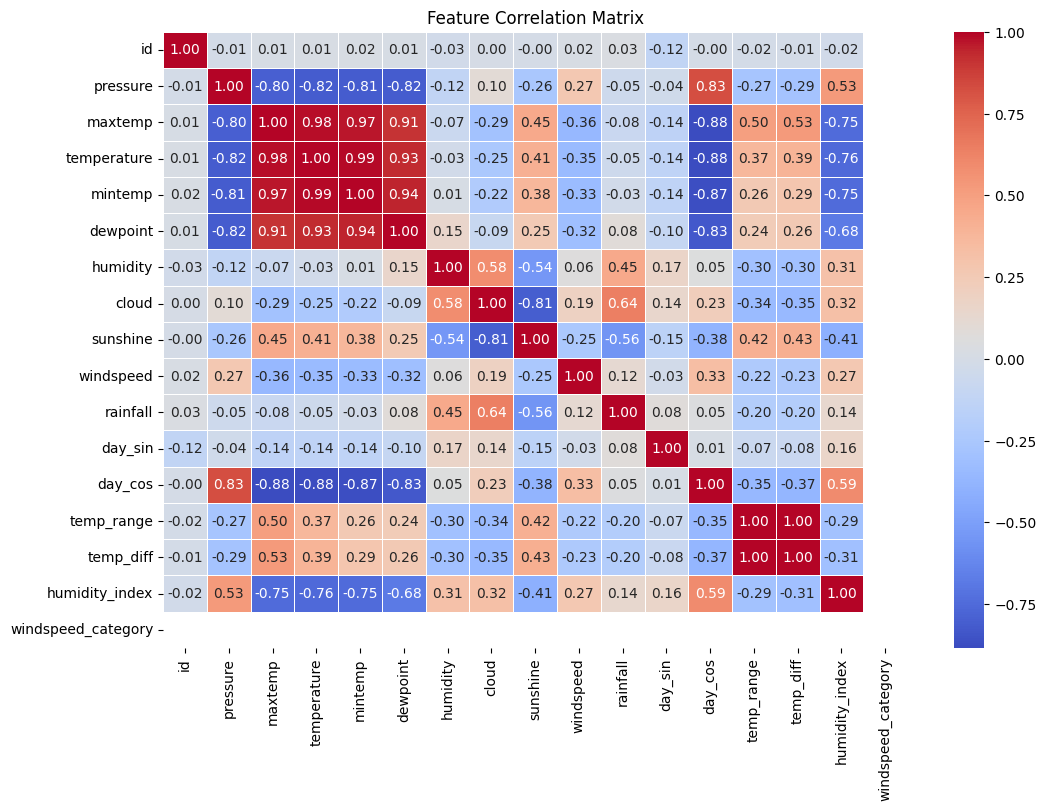

In [ ]:
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [148]:
# Compute correlation matrix
corr_matrix = df_train.select_dtypes(include=['number']).corr()

# Identify highly correlated features
correlation_threshold = 0.85  # Set threshold for high correlation

# Create a mask for upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation above the threshold
high_correlation_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)
]

# Drop highly correlated features from training dataset
df_train_dropped = df_train.drop(columns=high_correlation_features)

# Display removed features
print("Removed Highly Correlated Features:", high_correlation_features)

# Save cleaned dataset
df_train_dropped.to_csv("cleaned_train.csv", index=False)
print("Cleaned training dataset saved as 'cleaned_train.csv'")

Removed Highly Correlated Features: ['temperature', 'mintemp', 'dewpoint', 'temp_diff']
Cleaned training dataset saved as 'cleaned_train.csv'


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [149]:
# Save cleaned dataset in Kaggle working directory
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_train_dropped.to_csv(cleaned_train_path, index=False)

print(f"Cleaned training dataset saved as {cleaned_train_path}")


Cleaned training dataset saved as /kaggle/working/cleaned_train.csv


In [150]:
# Load the cleaned dataset
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Verify dataset structure
df_cleaned_info = df_cleaned_train.info()
df_cleaned_head = df_cleaned_train.head()

# Check for missing values
missing_values_cleaned = df_cleaned_train.isnull().sum()

df_cleaned_info, df_cleaned_head, missing_values_cleaned


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2190 non-null   int64  
 1   pressure            2190 non-null   float64
 2   maxtemp             2190 non-null   float64
 3   humidity            2190 non-null   float64
 4   cloud               2190 non-null   float64
 5   sunshine            2190 non-null   float64
 6   windspeed           2190 non-null   float64
 7   rainfall            2190 non-null   int64  
 8   day_sin             2190 non-null   float64
 9   day_cos             2190 non-null   float64
 10  temp_range          2190 non-null   float64
 11  winddir_10.0        2190 non-null   bool   
 12  winddir_15.0        2190 non-null   bool   
 13  winddir_20.0        2190 non-null   bool   
 14  winddir_25.0        2190 non-null   bool   
 15  winddir_30.0        2190 non-null   bool   
 16  winddi

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


(None,
    id  pressure   maxtemp  humidity  cloud  sunshine  windspeed  rainfall  \
 0   0    1017.4  0.421875  0.813559   88.0       1.1   0.232305         1   
 1   1    1019.5  0.226562  0.949153   91.0       0.0   0.317604         1   
 2   2    1024.1  0.351562  0.610169   47.0       8.3   0.248639         1   
 3   3    1013.4  0.300781  0.949153   95.0       0.0   0.566243         1   
 4   4    1021.8  0.425781  0.220339   45.0       3.6   0.370236         0   
 
     day_sin   day_cos  ...  winddir_240.0  winddir_250.0  winddir_250.3  \
 0  0.017213  0.999852  ...          False          False          False   
 1  0.034422  0.999407  ...          False          False          False   
 2  0.051620  0.998667  ...          False          False          False   
 3  0.068802  0.997630  ...          False          False          False   
 4  0.085965  0.996298  ...          False          False          False   
 
    winddir_260.0  winddir_270.0  winddir_280.0  winddir_290.0  w

In [151]:

# Define windspeed categories based on predefined thresholds
def categorize_windspeed(windspeed):
    if windspeed < 10:
        return "Low"
    elif 10 <= windspeed < 25:
        return "Medium"
    else:
        return "High"

# Apply categorization
df_cleaned_train['windspeed_category'] = df_cleaned_train['windspeed'].apply(categorize_windspeed)

# Convert to categorical type
df_cleaned_train['windspeed_category'] = pd.Categorical(df_cleaned_train['windspeed_category'])

# Save the cleaned dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train.to_csv(cleaned_train_path, index=False)

print(f"Cleaned training dataset saved as {cleaned_train_path}")

# Verify the updated column
print(df_cleaned_train[['windspeed', 'windspeed_category']].head())

Cleaned training dataset saved as /kaggle/working/cleaned_train.csv
   windspeed windspeed_category
0   0.232305                Low
1   0.317604                Low
2   0.248639                Low
3   0.566243                Low
4   0.370236                Low


In [153]:
import pandas as pd

# Load the cleaned dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Adjust windspeed categorization based on scaled values
def categorize_scaled_windspeed(windspeed):
    if windspeed < 0.33:
        return "Low"
    elif 0.33 <= windspeed < 0.66:
        return "Medium"
    else:
        return "High"

# Apply the updated categorization
df_cleaned_train['windspeed_category'] = df_cleaned_train['windspeed'].apply(categorize_scaled_windspeed)

# Save the fixed dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train.to_csv(cleaned_train_path, index=False)

print("Updated cleaned dataset saved as", cleaned_train_path)

# Verify the distribution of categories
print(df_cleaned_train['windspeed_category'].value_counts())


Updated cleaned dataset saved as /kaggle/working/cleaned_train.csv
windspeed_category
Low       1273
Medium     917
Name: count, dtype: int64


In [155]:
print(np.isinf(X).sum())  # Count number of inf values per column


id                           0
pressure                     0
maxtemp                      0
humidity                     0
cloud                        0
sunshine                     0
windspeed                    0
day_sin                      0
day_cos                      0
temp_range                   0
winddir_10.0                 0
winddir_15.0                 0
winddir_20.0                 0
winddir_25.0                 0
winddir_30.0                 0
winddir_40.0                 0
winddir_50.0                 0
winddir_60.0                 0
winddir_65.0                 0
winddir_70.0                 0
winddir_75.0                 0
winddir_80.0                 0
winddir_90.0                 0
winddir_100.0                0
winddir_110.0                0
winddir_120.0                0
winddir_130.0                0
winddir_140.0                0
winddir_150.0                0
winddir_160.0                0
winddir_170.0                0
winddir_180.0                0
winddir_

In [156]:
print(X.describe())  # Identify unusually large values


                id     pressure      maxtemp     humidity        cloud  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000  1013.602146     0.623664     0.729433    75.721918   
std     632.342866     5.655366     0.220872     0.132214    18.026498   
min       0.000000   999.000000     0.000000     0.000000     2.000000   
25%     547.250000  1008.600000     0.425781     0.644068    69.000000   
50%    1094.500000  1013.000000     0.679688     0.728814    83.000000   
75%    1641.750000  1017.775000     0.812500     0.830508    88.000000   
max    2189.000000  1034.600000     1.000000     1.000000   100.000000   

          sunshine    windspeed      day_sin      day_cos   temp_range  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean      3.744429     0.312078     0.014148    -0.002722     4.195708   
std       3.626327     0.165383     0.708346     0.706042     1.525268   
min       0.000000     0.085299    -0

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [158]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
X.fillna(X.max(), inplace=True)  # Replace NaN with max value


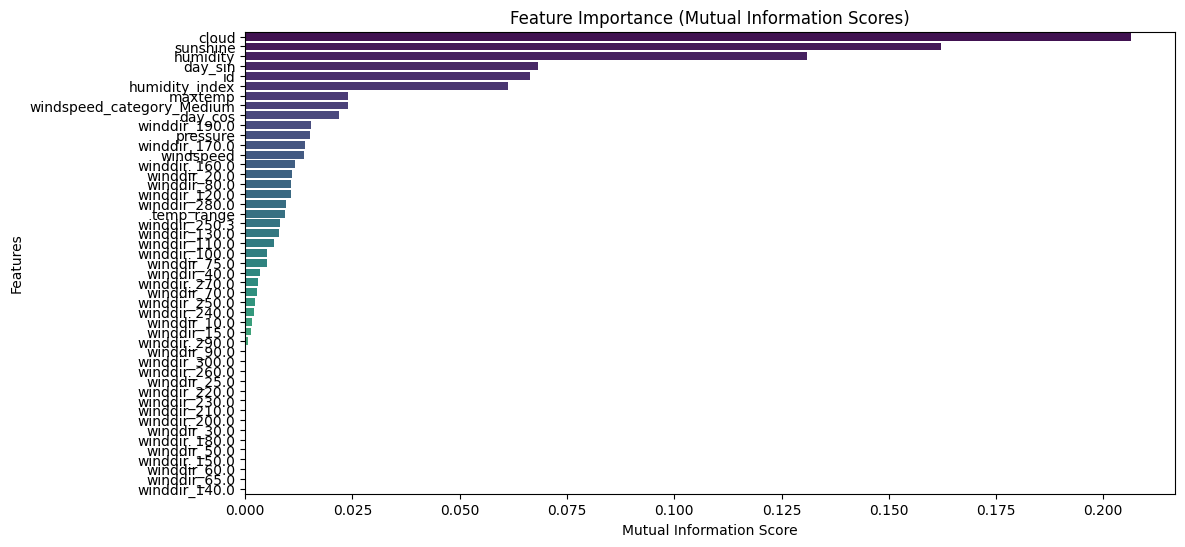

                      Feature  MI Score
4                       cloud  0.206422
5                    sunshine  0.162142
3                    humidity  0.131001
7                     day_sin  0.068264
0                          id  0.066448
45             humidity_index  0.061173
2                     maxtemp  0.024068
46  windspeed_category_Medium  0.024066
8                     day_cos  0.021779
32              winddir_190.0  0.015461


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Load the cleaned dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values for MI calculation
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Check for infinite values and extremely large values
if np.isinf(X).sum().sum() > 0:
    print("Warning: Infinite values detected in X. Replacing with max finite values.")
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.max(), inplace=True)

# Check for missing values and fill them
if X.isnull().sum().sum() > 0:
    print("Warning: NaN values detected in X. Filling with column max values.")
    X.fillna(X.max(), inplace=True)

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Convert to DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Plot Mutual Information Scores
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_scores_df['MI Score'], y=mi_scores_df['Feature'], palette='viridis')
plt.title("Feature Importance (Mutual Information Scores)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

# Display top features
print(mi_scores_df.head(10))

Infinity values in X: 1
NaN values in X: 0


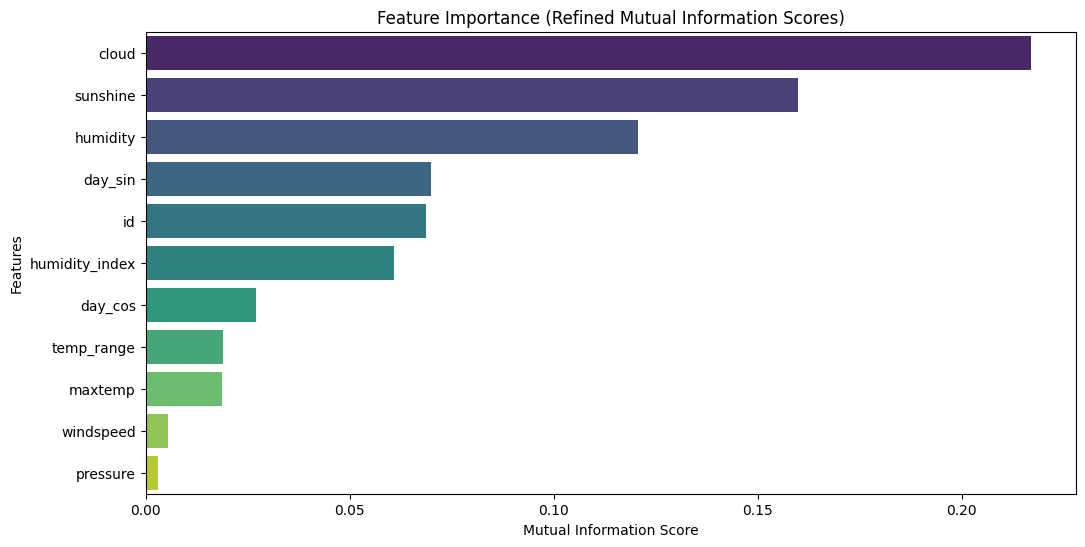

           Feature  MI Score
4            cloud  0.217102
5         sunshine  0.159864
3         humidity  0.120726
7          day_sin  0.069948
0               id  0.068602
10  humidity_index  0.060915
8          day_cos  0.027082
9       temp_range  0.019007
2          maxtemp  0.018679
6        windspeed  0.005511


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Load the cleaned dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values for MI calculation
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Drop low-impact features based on MI analysis
low_mi_features = ['id']  # Start with ID, and we will refine further

# Drop extremely low-impact features based on MI analysis
low_mi_features = ['windspeed_category_Medium']  # Identified as having near-zero importance

# Identify wind direction columns with very low MI scores
wind_dir_features = [col for col in df_encoded.columns if 'winddir' in col]

# Remove selected low-impact features
df_refined = df_encoded.drop(columns=low_mi_features + wind_dir_features, errors='ignore')

# Define features and target variable
X = df_refined.drop(columns=['rainfall'])  # Exclude target variable
y = df_refined['rainfall']  # Define target variable

# Check for Inf and NaN values
print("Infinity values in X:", np.isinf(X).sum().sum())
print("NaN values in X:", X.isna().sum().sum())

# Replace Inf and NaN with column max values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Compute Mutual Information scores after dropping low-impact features
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Convert to DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Plot Mutual Information Scores
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_scores_df['MI Score'], y=mi_scores_df['Feature'], palette='viridis')
plt.title("Feature Importance (Refined Mutual Information Scores)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

# Display top features after refinement
print(mi_scores_df.head(10))


Infinity values in X: 1
NaN values in X: 0
Accuracy: 0.8493
ROC AUC Score: 0.8748
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



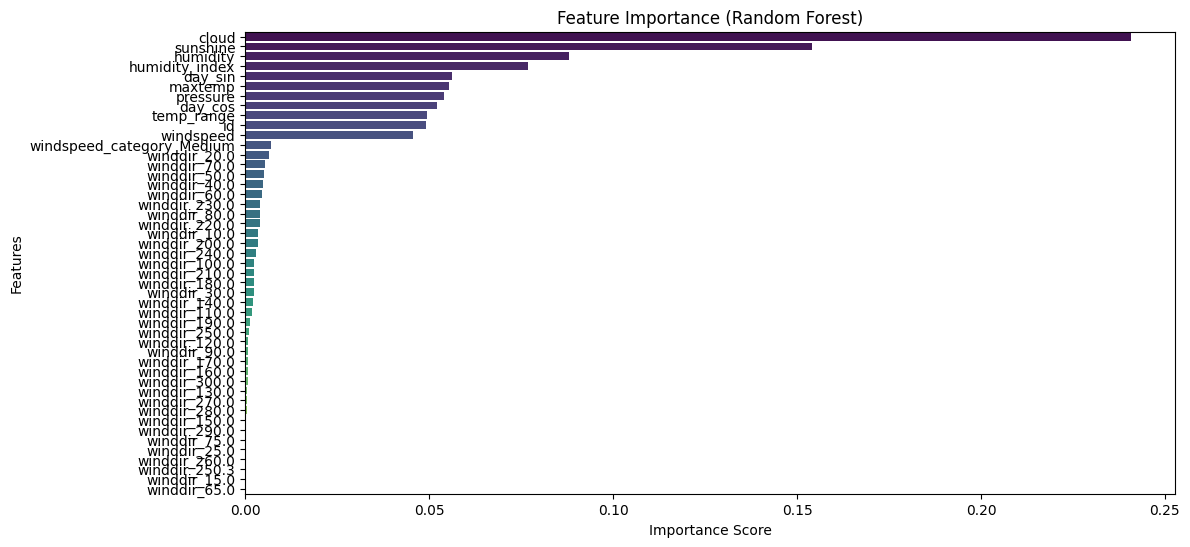

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Check for Inf and NaN values
print("Infinity values in X:", np.isinf(X).sum().sum())
print("NaN values in X:", X.isna().sum().sum())

# Replace Inf and NaN with column max values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Classification Report:\n", report)

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
if np.isinf(X).sum().sum() > 0:
    print("Fixing Inf values in X...")
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Classification Report:\n", report)

# Save the retrained model for hyperparameter tuning
import joblib
joblib.dump(model, "/kaggle/working/rf_base_model.pkl")

Fixing Inf values in X...
Accuracy: 0.8493
ROC AUC Score: 0.8748
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



['/kaggle/working/rf_base_model.pkl']

In [175]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
if np.isinf(X).sum().sum() > 0:
    print("Fixing Inf values in X...")
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.max(), inplace=True)


# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid,
    n_iter=20, cv=3, verbose=2, n_jobs=-1, scoring='roc_auc'
)

# Run Randomized Search
tuned_model = random_search.fit(X_train, y_train)

# Get best parameters
best_params = tuned_model.best_params_
print("Best Parameters:", best_params)

# Train the final model with best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_val)
y_pred_proba = final_model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

# Display results
print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Final Model ROC AUC Score: {roc_auc:.4f}")
print("Final Model Classification Report:\n", report)

# Save the tuned model
joblib.dump(final_model, "/kaggle/working/rf_tuned_model.pkl")

Fixing Inf values in X...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
Final Model Accuracy: 0.8447
Final Model ROC AUC Score: 0.8722
Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68       119
           1       0.86      0.93      0.90       319

    accuracy                           0.84       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.84      0.84      0.84       438



['/kaggle/working/rf_tuned_model.pkl']

In [176]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and final model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
final_model = grid_search.best_estimator_

# Make predictions
y_pred = final_model.predict(X_val)
y_pred_proba = final_model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Final Model ROC AUC Score: {roc_auc:.4f}")
print("Final Model Classification Report:\n", report)

# Save the final optimized model
joblib.dump(final_model, "/kaggle/working/final_rf_model.pkl")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Final Model Accuracy: 0.8470
Final Model ROC AUC Score: 0.8687
Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.61      0.68       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



['/kaggle/working/final_rf_model.pkl']

In [177]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and final model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
final_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred = final_xgb_model.predict(X_val)
y_pred_proba = final_xgb_model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final XGBoost Accuracy: {accuracy:.4f}")
print(f"Final XGBoost ROC AUC Score: {roc_auc:.4f}")
print("Final XGBoost Classification Report:\n", report)

# Save the final XGBoost model
joblib.dump(final_xgb_model, "/kaggle/working/final_xgb_model.pkl")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}
Final XGBoost Accuracy: 0.8630
Final XGBoost ROC AUC Score: 0.8639
Final XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72       119
           1       0.88      0.95      0.91       319

    accuracy                           0.86       438
   macro avg       0.85      0.79      0.81       438
weighted avg       0.86      0.86      0.86       438



['/kaggle/working/final_xgb_model.pkl']

In [179]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    """Objective function for Optuna hyperparameter tuning."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
    }
    model = XGBClassifier(**params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# Ensure trials exist before fetching best parameters
if len(study.trials) > 0:
    best_params = study.best_trial.params
    print("Best Parameters:", best_params)
else:
    raise ValueError("Optuna did not complete any trials successfully. Check if the study ran properly.")

# Train final XGBoost model with best parameters
final_xgb_model = XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
final_xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = final_xgb_model.predict(X_val)
y_pred_proba = final_xgb_model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final Optuna-Tuned XGBoost Accuracy: {accuracy:.4f}")
print(f"Final Optuna-Tuned XGBoost ROC AUC Score: {roc_auc:.4f}")
print("Final Optuna-Tuned XGBoost Classification Report:\n", report)

# Save the final tuned model
joblib.dump(final_xgb_model, "/kaggle/working/optuna_xgb_model.pkl")

[I 2025-03-15 19:17:15,687] A new study created in memory with name: no-name-8bdfe9bd-1366-4238-8fb0-470b276b32c3
[I 2025-03-15 19:17:16,305] Trial 2 finished with value: 0.860730593607306 and parameters: {'n_estimators': 400, 'learning_rate': 0.2227691690433707, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.8606453636698097, 'colsample_bytree': 0.9128385423501764, 'gamma': 3.8537846517192094, 'reg_alpha': 3.16662260202217, 'reg_lambda': 4.4403188219536105}. Best is trial 2 with value: 0.860730593607306.
[I 2025-03-15 19:17:16,828] Trial 0 finished with value: 0.8561643835616438 and parameters: {'n_estimators': 400, 'learning_rate': 0.035437312078033745, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.5023646813089022, 'colsample_bytree': 0.7369477497421355, 'gamma': 2.040860507184972, 'reg_alpha': 0.7470103485557983, 'reg_lambda': 4.401805058416098}. Best is trial 2 with value: 0.860730593607306.
[I 2025-03-15 19:17:17,174] Trial 1 finished with value: 0.858447488584474

Best Parameters: {'n_estimators': 800, 'learning_rate': 0.007301579813806205, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.9952735617816865, 'colsample_bytree': 0.8153756994963055, 'gamma': 1.2662449297834648, 'reg_alpha': 4.2479175683040795, 'reg_lambda': 3.4075848740668975}
Final Optuna-Tuned XGBoost Accuracy: 0.8676
Final Optuna-Tuned XGBoost ROC AUC Score: 0.8671
Final Optuna-Tuned XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.72       119
           1       0.88      0.95      0.91       319

    accuracy                           0.87       438
   macro avg       0.86      0.80      0.82       438
weighted avg       0.86      0.87      0.86       438



['/kaggle/working/optuna_xgb_model.pkl']

In [180]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import StackingClassifier

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
xgb_model = XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12, 
                          min_child_weight=1, subsample=0.995, colsample_bytree=0.815, 
                          gamma=1.266, reg_alpha=4.248, reg_lambda=3.408, 
                          objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10, 
                            subsample=0.9, colsample_bytree=0.8, random_state=42)

rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=2, bootstrap=False, random_state=42)

# Define Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
    final_estimator=LogisticRegression(),
    cv=5, n_jobs=-1)

# Train the stacked model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_val)
y_pred_proba = stacking_model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final Stacking Model Accuracy: {accuracy:.4f}")
print(f"Final Stacking Model ROC AUC Score: {roc_auc:.4f}")
print("Final Stacking Model Classification Report:\n", report)

# Save the final stacked model
joblib.dump(stacking_model, "/kaggle/working/stacking_model.pkl")


Final Stacking Model Accuracy: 0.8607
Final Stacking Model ROC AUC Score: 0.8693
Final Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.61      0.71       119
           1       0.87      0.95      0.91       319

    accuracy                           0.86       438
   macro avg       0.85      0.78      0.81       438
weighted avg       0.86      0.86      0.85       438



['/kaggle/working/stacking_model.pkl']

In [181]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination (RFE)
xgb_selector = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
rfe = RFE(estimator=xgb_selector, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)

# Define base models
xgb_model = XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12, 
                          min_child_weight=1, subsample=0.995, colsample_bytree=0.815, 
                          gamma=1.266, reg_alpha=4.248, reg_lambda=3.408, 
                          objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10, 
                            subsample=0.9, colsample_bytree=0.8, random_state=42)

rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=2, bootstrap=False, random_state=42)

# Define Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
    final_estimator=LogisticRegression(),
    cv=5, n_jobs=-1)

# Train the stacked model with RFE-selected features
stacking_model.fit(X_train_rfe, y_train)

# Make predictions
y_pred = stacking_model.predict(X_val_rfe)
y_pred_proba = stacking_model.predict_proba(X_val_rfe)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final Stacking Model with RFE Accuracy: {accuracy:.4f}")
print(f"Final Stacking Model with RFE ROC AUC Score: {roc_auc:.4f}")
print("Final Stacking Model with RFE Classification Report:\n", report)

# Save the final stacked model with RFE-selected features
joblib.dump(stacking_model, "/kaggle/working/stacking_model_rfe.pkl")


Final Stacking Model with RFE Accuracy: 0.8584
Final Stacking Model with RFE ROC AUC Score: 0.8664
Final Stacking Model with RFE Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.61      0.70       119
           1       0.87      0.95      0.91       319

    accuracy                           0.86       438
   macro avg       0.85      0.78      0.80       438
weighted avg       0.86      0.86      0.85       438



['/kaggle/working/stacking_model_rfe.pkl']

In [182]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination (RFE)
xgb_selector = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
rfe = RFE(estimator=xgb_selector, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)

# Apply Polynomial Features Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_rfe)
X_val_poly = poly.transform(X_val_rfe)

# Define base models
xgb_model = XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12, 
                          min_child_weight=1, subsample=0.995, colsample_bytree=0.815, 
                          gamma=1.266, reg_alpha=4.248, reg_lambda=3.408, 
                          objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10, 
                            subsample=0.9, colsample_bytree=0.8, random_state=42)

rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=2, bootstrap=False, random_state=42)

# Define Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
    final_estimator=LogisticRegression(),
    cv=5, n_jobs=-1)

# Train the stacked model with Polynomial Features
stacking_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = stacking_model.predict(X_val_poly)
y_pred_proba = stacking_model.predict_proba(X_val_poly)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final Stacking Model with Polynomial Features Accuracy: {accuracy:.4f}")
print(f"Final Stacking Model with Polynomial Features ROC AUC Score: {roc_auc:.4f}")
print("Final Stacking Model with Polynomial Features Classification Report:\n", report)

# Save the final stacked model with Polynomial Features
joblib.dump(stacking_model, "/kaggle/working/stacking_model_poly.pkl")


Final Stacking Model with Polynomial Features Accuracy: 0.8493
Final Stacking Model with Polynomial Features ROC AUC Score: 0.8702
Final Stacking Model with Polynomial Features Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.68       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



['/kaggle/working/stacking_model_poly.pkl']

In [183]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination (RFE)
xgb_selector = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
rfe = RFE(estimator=xgb_selector, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)

# Apply Polynomial Features Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_rfe)
X_val_poly = poly.transform(X_val_rfe)

# Define base models
xgb_model = XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12, 
                          min_child_weight=1, subsample=0.995, colsample_bytree=0.815, 
                          gamma=1.266, reg_alpha=4.248, reg_lambda=3.408, 
                          objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10, 
                            subsample=0.9, colsample_bytree=0.8, random_state=42)

rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=2, bootstrap=False, random_state=42)

# Define Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
    final_estimator=LogisticRegression(),
    cv=5, n_jobs=-1)

# Train the stacked model with SMOTE and Polynomial Features
stacking_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = stacking_model.predict(X_val_poly)
y_pred_proba = stacking_model.predict_proba(X_val_poly)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final Stacking Model with SMOTE & Polynomial Features Accuracy: {accuracy:.4f}")
print(f"Final Stacking Model with SMOTE & Polynomial Features ROC AUC Score: {roc_auc:.4f}")
print("Final Stacking Model with SMOTE & Polynomial Features Classification Report:\n", report)

# Save the final stacked model with SMOTE and Polynomial Features
joblib.dump(stacking_model, "/kaggle/working/stacking_model_smote_poly.pkl")


Final Stacking Model with SMOTE & Polynomial Features Accuracy: 0.9045
Final Stacking Model with SMOTE & Polynomial Features ROC AUC Score: 0.9607
Final Stacking Model with SMOTE & Polynomial Features Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       328
           1       0.91      0.90      0.90       332

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



['/kaggle/working/stacking_model_smote_poly.pkl']

In [ ]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the refined dataset
cleaned_train_path = "/kaggle/working/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Fix Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination (RFE)
xgb_selector = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
rfe = RFE(estimator=xgb_selector, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)

# Apply Polynomial Features Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_rfe)
X_val_poly = poly.transform(X_val_rfe)

# Define base models
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.005, max_depth=15, 
                          min_child_weight=1, subsample=0.98, colsample_bytree=0.85, 
                          gamma=1.1, reg_alpha=3.8, reg_lambda=3.2, 
                          objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=800, learning_rate=0.008, max_depth=12, 
                            subsample=0.92, colsample_bytree=0.85, random_state=42)

rf_model = RandomForestClassifier(n_estimators=600, max_depth=20, min_samples_split=2, 
                                  min_samples_leaf=1, bootstrap=True, random_state=42)

catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.005, depth=10, 
                                    l2_leaf_reg=3.5, random_strength=1, border_count=254, 
                                    verbose=0, random_state=42)

# Define Stacking Classifier with CatBoost
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model), ('catboost', catboost_model)],
    final_estimator=LogisticRegression(),
    cv=5, n_jobs=-1)

# Train the stacked model with SMOTE, Polynomial Features, and CatBoost
stacking_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = stacking_model.predict(X_val_poly)
y_pred_proba = stacking_model.predict_proba(X_val_poly)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)

print(f"Final Stacking Model with CatBoost Accuracy: {accuracy:.4f}")
print(f"Final Stacking Model with CatBoost ROC AUC Score: {roc_auc:.4f}")
print("Final Stacking Model with CatBoost Classification Report:\n", report)

# Save the final stacked model with CatBoost
joblib.dump(stacking_model, "/kaggle/working/stacking_model_catboost.pkl")


